In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt

from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from livelossplot import PlotLossesKeras

C:\Users\DLP\AppData\Local\Temp\ipykernel_10972\894947171.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize data shape

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


# Display one of the samples

In [4]:
#pick a sample
image_idx=int(X_train.shape[0]/2)
picture = X_train[image_idx]
print(picture.shape)
#picture = picture.reshape(28,28) 

(28, 28)


In [5]:
# Display the sample label
lbl = y_train[image_idx]
print(f"Sample {image_idx}, label = {y_train[image_idx]}")

Sample 30000, label = 3


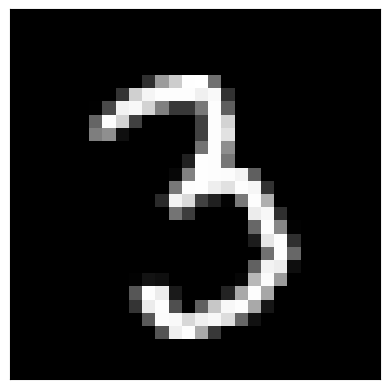

In [6]:
# Display the handwritten digit image
plt.imshow(picture, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show() 

# Reshape the data. Images are 28x28 and 1 Channel (gray scale)

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Normalize the data between 0 and 1 (colors are coded from 0 to 255 so just divide by 255)

In [8]:
X_train = X_train/255
X_test = X_test/255

### Define the CNN Architecture

In [9]:
model = Sequential()

# CNN
# Convolutional Layer
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#add flattening layer
model.add(Flatten())


# ANN
model.add(Dense(units=128, activation='relu'))

#add a dense hidden layer
#model.add(Dense(units=64, activation='relu'))

#add softmax activation on dense layer for output
model.add(Dense(units=10, activation='softmax'))

# Compile CNN

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607394 (2.32 MB)
Trainable params: 607394 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

# Train the CNN

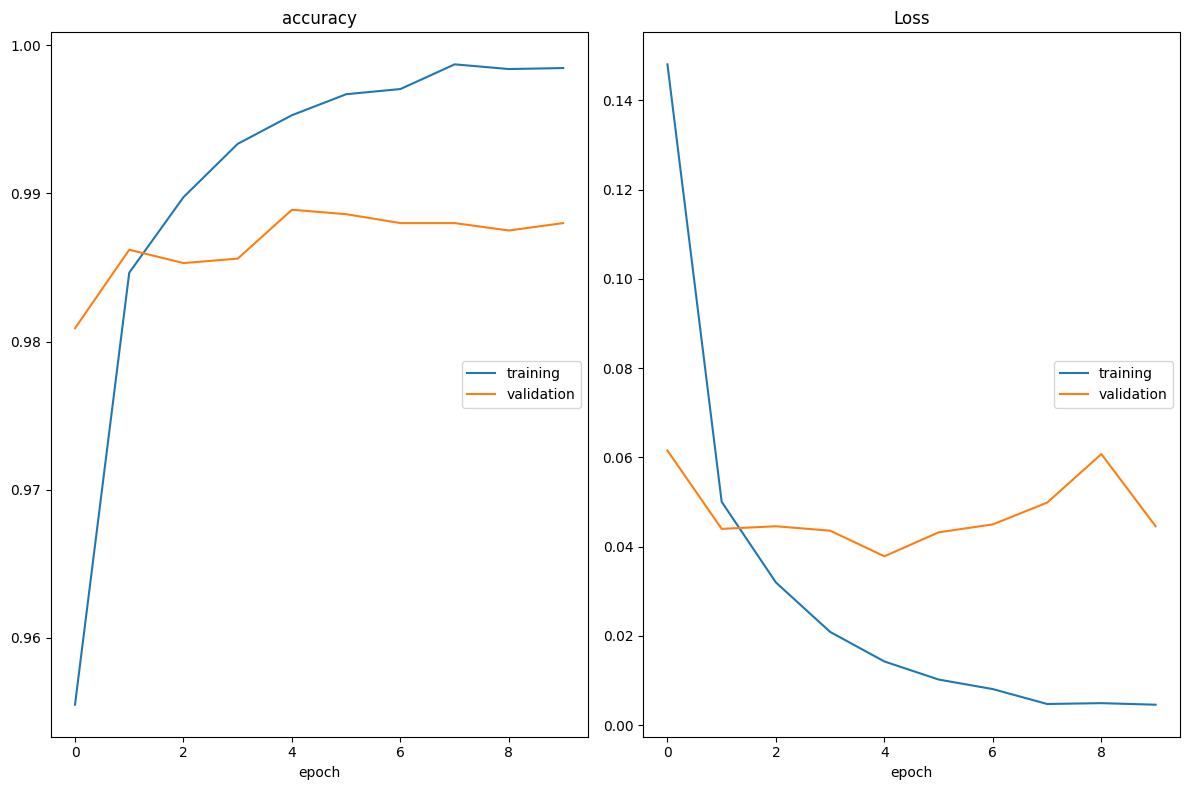

accuracy
	training         	 (min:    0.955, max:    0.999, cur:    0.998)
	validation       	 (min:    0.981, max:    0.989, cur:    0.988)
Loss
	training         	 (min:    0.005, max:    0.148, cur:    0.005)
	validation       	 (min:    0.038, max:    0.062, cur:    0.045)


In [11]:
model.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [12]:
# get the model's performance
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.9880


In [14]:
print(f"Loss (sparse_categorical_crossentropy) = {loss}")
print(f"Accuracy = {accuracy}")

Loss (sparse_categorical_crossentropy) = 0.04458492249250412
Accuracy = 0.9879999756813049
